# Tokenization schemes of the dataset. Vary n for n-gram (n=1; 2; 3; 4)

In [1]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re
import random
from itertools import product
import pandas as pd
import pickle as pkl
from funcy import flatten
from nltk import everygrams


In [84]:
train_neg_path = '/Users/zhangben/Desktop/1011 NLP/HW/HW1/aclImdb/train/neg'
train_pos_path = '/Users/zhangben/Desktop/1011 NLP/HW/HW1/aclImdb/train/pos'
test_neg_path = '/Users/zhangben/Desktop/1011 NLP/HW/HW1/aclImdb/test/neg'
test_pos_path = '/Users/zhangben/Desktop/1011 NLP/HW/HW1/aclImdb/test/pos'

allfilelist=[]
trainfilelist = []
for txt in os.listdir(train_neg_path):
    txt_path = train_neg_path + '/' + txt
    with open(txt_path, 'r') as f:
        trainfilelist.append(txt)
    
for txt in os.listdir(train_pos_path):
    txt_path = train_pos_path + '/' + txt
    with open(txt_path, 'r') as f:
        trainfilelist.append(txt)
    
testfilelist = []
for txt in os.listdir(test_neg_path):
    txt_path = train_pos_path + '/' + txt
    with open(txt_path, 'r') as f:
        testfilelist.append(txt)
        
for txt in os.listdir(test_neg_path):
    txt_path = train_pos_path + '/' + txt
    with open(txt_path, 'r') as f:
        testfilelist.append(txt)

In [85]:
#load each txt and return a list of data, a list of target
def load_txt(filepath):
    data = []
    target = []
    label = filepath.split('/')[-1]
    for txt in os.listdir(filepath):
        txt_path = filepath + '/' + txt
        with open(txt_path, 'r') as f:
            txtfile = f.read() #f.read() can only be read by once
            if len(txtfile) != 0: #remove empty txt
                new_text=re.sub('<br />','',txtfile) #remove '<br />'
                data.append(new_text)   
                if label == 'neg':
                    target.append(0)
                if label == 'pos':
                    target.append(1)
    return data, target

In [95]:
#data path
train_neg_path = '/Users/zhangben/Desktop/1011 NLP/HW/HW1/aclImdb/train/neg'
train_pos_path = '/Users/zhangben/Desktop/1011 NLP/HW/HW1/aclImdb/train/pos'
test_neg_path = '/Users/zhangben/Desktop/1011 NLP/HW/HW1/aclImdb/test/neg'
test_pos_path = '/Users/zhangben/Desktop/1011 NLP/HW/HW1/aclImdb/test/pos'

#load txt data
train_neg,train_neg_target = load_txt(train_neg_path)
train_pos,train_pos_target = load_txt(train_pos_path)
test_neg,test_neg_target = load_txt(test_neg_path)
test_pos,test_pos_target = load_txt(test_pos_path)

#combine neg & pos dataset
train_data_all = train_neg + train_pos
train_targets_all = train_neg_target + train_pos_target

test_data = test_neg + test_pos
test_targets = test_neg_target + test_pos_target


In [96]:
# find duplicates 
alldataset, seen, dup = train_data_all + test_data, set(),[]
for idx, item in enumerate(alldataset):
    if item not in seen:
        seen.add(item)
    else:
        dup.append(idx)
train_dup_idx = [i for i in dup if i < 25000]
test_dup_idx = [i-25000 for i in dup if i>=25000]
print(len(train_dup_idx),len(test_dup_idx))
        

97 322


In [97]:
# remove duplicates 
train_data_all_dedup = [i for j, i in enumerate(train_data_all) 
                        if j not in train_dup_idx]
train_targets_all_dedup = [i for j, i in enumerate(train_targets_all) 
                        if j not in train_dup_idx]
test_data_dedup = [i for j, i in enumerate(test_data) 
                        if j not in test_dup_idx]
test_targets_dedup = [i for j, i in enumerate(test_targets) 
                        if j not in test_dup_idx]

In [98]:
print(len(train_data_all_dedup))

24903


In [99]:
train_data_all_sf, train_targets_all_sf= shuffle(train_data_all_dedup,
                                                 train_targets_all_dedup, random_state=2)
test_data, test_targets= shuffle(test_data_dedup, 
                                 test_targets_dedup, random_state=2)

# Split train data into actual train and validation sets
train_split = 20000

train_data = train_data_all_sf[:train_split]
train_targets = train_targets_all_sf[:train_split]
val_data = train_data_all_sf[train_split:]
val_targets = train_targets_all_sf[train_split:]

print ("Train dataset size is {}".format(len(train_data)))
print ("Val dataset size is {}".format(len(val_data)))
print ("Test dataset size is {}".format(len(test_data)))

Train dataset size is 20000
Val dataset size is 4903
Test dataset size is 24678


In [100]:
pkl.dump(train_data, open("train_data.p", "wb"))
pkl.dump(train_targets, open("train_targets.p", "wb"))
pkl.dump(val_data, open("val_data.p", "wb"))
pkl.dump(val_targets, open("val_targets.p", "wb"))
pkl.dump(test_data, open("test_data.p", "wb"))
pkl.dump(test_targets, open("test_targets.p", "wb"))

In [199]:
train_data = pkl.load(open("train_data.p", "rb"))
val_data = pkl.load(open("val_data.p", "rb"))
test_data = pkl.load(open("test_data.p", "rb"))

train_targets = pkl.load(open("train_targets.p", "rb"))
val_targets = pkl.load(open("val_targets.p", "rb"))
test_targets = pkl.load(open("test_targets.p", "rb"))

In [101]:
# Random sample from train dataset
print (train_data[random.randint(0, len(train_data) - 1)])

Will they ever make movies without nudity and sex? This came on at 3:00 on Sunday afternoon and I couldn't believe what they showed. Thank God my son was outside or I would have been freaked out if he had seen the soft/medium porn! Do people who make movies not care who they offend or corrupt? Kids could have been watching after church and that is what they show???!!! The acting was good and I enjoyed the suspense but GEE! There was violence and bad guys but that is to be expected in a western movie. Randy Travis was really good in his role. If the writers, directors and producers would just quit putting on so much uncalled for sex scenes. What has to happen to get them to quit going in that direction? Where can I complain?


In [119]:
# Let's write the tokenization function 
import spacy
import string
#stopwords list
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Load English tokenizer, tagger, parser, NER and word vectors
tokenizer = spacy.load('en_core_web_sm')
punctuations = string.punctuation

# lowercase and remove punctuation, remove stopwords, stemming words
def tokenize(sent):
    tokens = tokenizer(sent)
    tokens_lower = [token.text.lower() for token in tokens if (token.text not in punctuations)]
    filtered_tokens = [w for w in tokens_lower if not w in stop_words]
    lancaster=nltk.LancasterStemmer()
    stemmed_tokens = [lancaster.stem(w) for w in filtered_tokens]
    
    return stemmed_tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhangben/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [117]:
def tokenize_dataset(dataset):
    token_dataset_1gram = []
    token_dataset_2gram = []
    token_dataset_3gram = []
    token_dataset_4gram = []
    # we are keeping track of all tokens in dataset 
    # in order to create vocabulary later
    all_tokens_1gram = []
    all_tokens_2gram = []
    all_tokens_3gram = []
    all_tokens_4gram = []
    
    for sample in dataset:
        tokens = tokenize(sample)
        token_dataset_1gram.append(tokens) #list of list
        all_tokens_1gram += tokens #one list
        
        #2grams
        tokens_2gram = list(everygrams(tokens, max_len=2))
        token_dataset_2gram.append(tokens_2gram)
        all_tokens_2gram += tokens_2gram
        
        #3grams
        tokens_3gram = list(everygrams(tokens, max_len=3))
        token_dataset_3gram.append(tokens_3gram)
        all_tokens_3gram += tokens_3gram
        
        #4grams
        tokens_4gram = list(everygrams(tokens, max_len=4))
        token_dataset_4gram.append(tokens_4gram)
        all_tokens_4gram += tokens_4gram 

    return (token_dataset_1gram,token_dataset_2gram,token_dataset_3gram,token_dataset_4gram,
            all_tokens_1gram,all_tokens_2gram, all_tokens_3gram, all_tokens_4gram)

# val set tokens
print ("Tokenizing val data")
val_data_tokens_1,val_data_tokens_2, val_data_tokens_3, val_data_tokens_4, _, _ , _,  _ = tokenize_dataset(val_data)
pkl.dump(val_data_tokens_1, open("val_data_tokens_1.p", "wb"))
pkl.dump(val_data_tokens_2, open("val_data_tokens_2.p", "wb"))
pkl.dump(val_data_tokens_3, open("val_data_tokens_3.p", "wb"))
pkl.dump(val_data_tokens_4, open("val_data_tokens_4.p", "wb"))

# test set tokens
print ("Tokenizing test data")
test_data_tokens, _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens, open("test_data_tokens.p", "wb"))

test_data_tokens_1,test_data_tokens_2, test_data_tokens_3, test_data_tokens_4, _, _ , _,  _ = tokenize_dataset(test_data)
pkl.dump(test_data_tokens_1, open("test_data_tokens_1.p", "wb"))
pkl.dump(test_data_tokens_2, open("test_data_tokens_2.p", "wb"))
pkl.dump(test_data_tokens_3, open("test_data_tokens_3.p", "wb"))
pkl.dump(test_data_tokens_4, open("test_data_tokens_4.p", "wb"))

# train set tokens
print ("Tokenizing train data")
(train_data_tokens_1,train_data_tokens_2,train_data_tokens_3,train_data_tokens_4,
 all_train_tokens_1,all_train_tokens_2,all_train_tokens_3,all_train_tokens_4) = tokenize_dataset(train_data)
pkl.dump(train_data_tokens_1, open("train_data_tokens_1.p", "wb"))
pkl.dump(train_data_tokens_2, open("train_data_tokens_2.p", "wb"))
pkl.dump(train_data_tokens_3, open("train_data_tokens_3.p", "wb"))
pkl.dump(train_data_tokens_4, open("train_data_tokens_4.p", "wb"))

pkl.dump(all_train_tokens_1, open("all_train_tokens_1.p", "wb"))
pkl.dump(all_train_tokens_2, open("all_train_tokens_2.p", "wb"))
pkl.dump(all_train_tokens_3, open("all_train_tokens_3.p", "wb"))
pkl.dump(all_train_tokens_4, open("all_train_tokens_4.p", "wb"))


Tokenizing val data


KeyboardInterrupt: 

# 1gram

In [19]:
# Then, load preprocessed train, val and test datasets
train_data_tokens = pkl.load(open("train_data_tokens_1.p", "rb"))
all_train_tokens = pkl.load(open("all_train_tokens_1.p", "rb"))

val_data_tokens = pkl.load(open("val_data_tokens_1.p", "rb"))
test_data_tokens = pkl.load(open("test_data_tokens_1.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens)))
print ("Val dataset size is {}".format(len(val_data_tokens)))
print ("Test dataset size is {}".format(len(test_data_tokens)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens)))

Train dataset size is 20000
Val dataset size is 4903
Test dataset size is 24678
Total number of tokens in train dataset is 2518544


Now, we are going to create the vocabulary of most common 15,000 tokens in the training set.

In [20]:
from collections import Counter
#Counter模块统计一段句子里面所有str出现次数 'apple' 就是一个str，‘an apple’ 也是一个str
#返回结果类似这样 [(' ', 54), ('e', 32), ('s', 25), ('a', 24), ('t', 24)], most_common的返回结果也是一样

max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1

def build_vocab(all_tokens):
    # Returns:
    # id2token: list of tokens, where id2token[i] returns token that corresponds to token i
    # token2id: dictionary where keys represent tokens and corresponding values represent indices
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(max_vocab_size)) # vocab,count are tuple,like ('apple', 'is', 'looking', 'at')
    id2token = list(vocab)
    token2id = dict(zip(vocab, range(2,2+len(vocab)))) #good way to creat new dic 
    id2token = ['<pad>', '<unk>'] + id2token
    token2id['<pad>'] = PAD_IDX 
    token2id['<unk>'] = UNK_IDX
    return token2id, id2token

In [21]:
token2id, id2token = build_vocab(all_train_tokens)
# Lets check the dictionary by loading random token from it
random_token_id = random.randint(0, len(id2token)-1)
random_token = id2token[random_token_id]

print ("Token id {} ; token {}".format(random_token_id, id2token[random_token_id]))
print ("Token {}; token id {}".format(random_token, token2id[random_token]))

Token id 3247 ; token colonel
Token colonel; token id 3247


In [22]:
# convert token to id in the dataset
def token2index_dataset(tokens_data):
    indices_data = []
    for tokens in tokens_data:
        index_list = [token2id[token] if token in token2id else UNK_IDX for token in tokens]
        indices_data.append(index_list)
    return indices_data


In [23]:
train_data_indices = token2index_dataset(train_data_tokens)
val_data_indices = token2index_dataset(val_data_tokens)
test_data_indices = token2index_dataset(test_data_tokens)

# double checking
print ("Train dataset size is {}".format(len(train_data_indices)))
print ("Val dataset size is {}".format(len(val_data_indices)))
print ("Test dataset size is {}".format(len(test_data_indices)))

Train dataset size is 20000
Val dataset size is 4903
Test dataset size is 24678


187.72915 2277


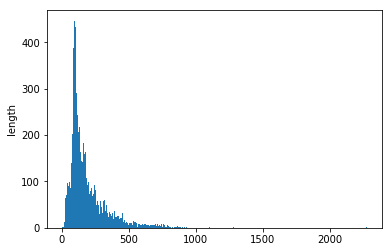

In [19]:
#check the distribution of txt length and find the mean 
total = 0
lengthlist=[]
for data in train_data_indices_2n:
    lengthlist.append(len(data))
    total += len(data)
mean_length = total/len(train_data_indices_2n)
print(mean_length,max(lengthlist))

plt.hist(lengthlist, bins=1000)
plt.ylabel('length');

Now we are going to create PyTorch DataLoader 

In [24]:
MAX_SENTENCE_LENGTH = 450 

import numpy as np
import torch
from torch.utils.data import Dataset

class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)  #padded_vec 是一个1d， 200长的vector
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]
    #LongTensor 好像输出的是int？？？
# create pytorch dataloader
#train_loader = NewsGroupDataset(train_data_indices, train_targets)
#val_loader = NewsGroupDataset(val_data_indices, val_targets)
#test_loader = NewsGroupDataset(test_data_indices, test_targets)

BATCH_SIZE = 32
train_dataset = NewsGroupDataset(train_data_indices, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

Here we will define Bag-of-Words model in PyTorch

In [25]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class BagOfWords(nn.Module):
    """
    BagOfWords classification model
    """
    def __init__(self, vocab_size, emb_dim):
        """
        @param vocab_size: size of the vocabulary. 
        @param emb_dim: size of the word embedding
        """
        super(BagOfWords, self).__init__() #这个是为了继承nn.Module 这个父类class的性质。
        # pay attention to padding_idx 
        self.embed = nn.Embedding(vocab_size, emb_dim, padding_idx=0) #就是把原来每个是数字的词，变成向量，这里是一个100维的
        self.linear = nn.Linear(emb_dim,2) #input 和 output的size就可以了
        
    def forward(self, data, length):
        """
        
        @param data: matrix of size (batch_size, max_sentence_length). Each row in data represents a 
            review that is represented using n-gram index. Note that they are padded to have same length.
        @param length: an int tensor of size (batch_size), which represents the non-trivial (excludes padding)
            length of each sentences in the data.
        """
        out = self.embed(data) #把 batch里的row的每个数字变成向量
        out = torch.sum(out, dim=1)#把每个row里的所有向量相加
        out /= length.view(length.size()[0],1).expand_as(out).float() #view 是在reshape这个tensor; expand_as就是将其扩充到out的维度
        #length 原来是一个 1d 的tensor，现在变成length.size()[0]*1，再变成length.size()[0]*100，和out一样
        # return logits
        out = self.linear(out.float()) #batch_size*20的matrix
        return out

In [27]:
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

learning_rate = 0.01
num_epochs = 10 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
def test_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    model.eval()
    for data, lengths, labels in loader:
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]  #1代表找出每行的最大值，[1]代表这个最大值在的位置
        
        total += labels.size(0)
        correct += predicted.eq(labels.view_as(predicted)).sum().item()
    return (100 * correct / total)

eachval_accuracy_list1 = []
for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train() #是怎么回事
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            eachval_accuracy_list1.append(val_acc)
#             print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
#                        epoch+1, num_epochs, i+1, len(train_loader), val_acc))

In [127]:
# print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))
print ("Test Acc {}".format(test_model(test_loader, model)))

Val Acc 87.53824189271874
Test Acc 84.08704108922927


# 2 gram

In [32]:
# Then, load preprocessed train, val and test datasets
train_data_tokens_2 = pkl.load(open("train_data_tokens_2.p", "rb"))
all_train_tokens_2 = pkl.load(open("all_train_tokens_2.p", "rb"))

val_data_tokens_2 = pkl.load(open("val_data_tokens_2.p", "rb"))
test_data_tokens_2 = pkl.load(open("test_data_tokens_2.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens_2)))
print ("Val dataset size is {}".format(len(val_data_tokens_2)))
print ("Test dataset size is {}".format(len(test_data_tokens_2)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens_2)))

Train dataset size is 20000
Val dataset size is 4903
Test dataset size is 24678
Total number of tokens in train dataset is 5017088


In [33]:
# build a vocabulary of size = 10000 for combined 1,2 grams tokens.
max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1
token2id, id2token = build_vocab(all_train_tokens_2)

In [34]:
#indexing other datasets
train_data_indices_2n = token2index_dataset(train_data_tokens_2)
val_data_indices_2n = token2index_dataset(val_data_tokens_2)
test_data_indices_2n = token2index_dataset(test_data_tokens_2)


250.8544 2921


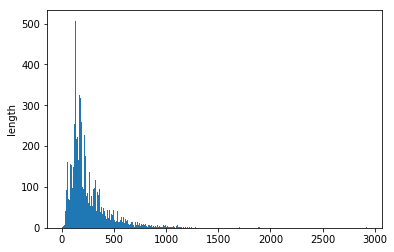

In [133]:
#check the distribution of txt length and find the mean 
total = 0
lengthlist=[]
for data in train_data_indices_2n:
    lengthlist.append(len(data))
    total += len(data)
mean_length = total/len(train_data_indices_2n)
print(mean_length,max(lengthlist))

plt.hist(lengthlist, bins=1000)
plt.ylabel('length');

In [35]:
MAX_SENTENCE_LENGTH = 800
class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)  #padded_vec 是一个1d， 200长的vector
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

In [36]:
#build model
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

#dataloader for pytorch
train_dataset = NewsGroupDataset(train_data_indices_2n, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices_2n, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices_2n, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

learning_rate = 0.01
num_epochs = 10 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
eachval_accuracy_list2 = []
for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train() 
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            eachval_accuracy_list2.append(val_acc)
#             print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
#                        epoch+1, num_epochs, i+1, len(train_loader), val_acc))

In [136]:
# print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))
print ("Test Acc {}".format(test_model(test_loader, model)))

Val Acc 87.57903324495207
Test Acc 86.56293054542508


# 3-gram

In [38]:
# Then, load preprocessed train, val and test datasets
train_data_tokens_3 = pkl.load(open("train_data_tokens_3.p", "rb"))
all_train_tokens_3 = pkl.load(open("all_train_tokens_3.p", "rb"))

val_data_tokens_3 = pkl.load(open("val_data_tokens_3.p", "rb"))
test_data_tokens_3 = pkl.load(open("test_data_tokens_3.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens_2)))
print ("Val dataset size is {}".format(len(val_data_tokens_2)))
print ("Test dataset size is {}".format(len(test_data_tokens_2)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens_2)))

# build a vocabulary of size = 10000 for combined 1,2 grams tokens.
max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1
token2id, id2token = build_vocab(all_train_tokens_3)


Train dataset size is 20000
Val dataset size is 4903
Test dataset size is 24678
Total number of tokens in train dataset is 5017088


In [39]:
#indexing other datasets
train_data_indices_3n = token2index_dataset(train_data_tokens_3)
val_data_indices_3n = token2index_dataset(val_data_tokens_3)
test_data_indices_3n = token2index_dataset(test_data_tokens_3)


374.7816 4380


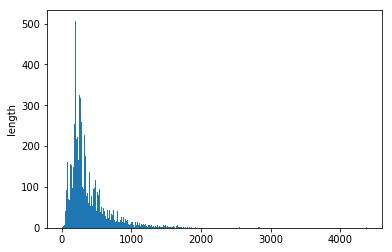

In [140]:
#check the distribution of txt length and find the mean 
total = 0
lengthlist=[]
for data in train_data_indices_3n:
    lengthlist.append(len(data))
    total += len(data)
mean_length = total/len(train_data_indices_3n)
print(mean_length,max(lengthlist))

plt.hist(lengthlist, bins=1000)
plt.ylabel('length');

In [40]:
MAX_SENTENCE_LENGTH = 1200
class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)  #padded_vec 是一个1d， 200长的vector
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

In [41]:

#build model
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

#dataloader for pytorch
train_dataset = NewsGroupDataset(train_data_indices_3n, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices_3n, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices_3n, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

learning_rate = 0.01
num_epochs = 10 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
eachval_accuracy_list3=[]
for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train() 
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            eachval_accuracy_list3.append(val_acc)
#             print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
#                        epoch+1, num_epochs, i+1, len(train_loader), val_acc))

In [143]:
# print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))
print ("Test Acc {}".format(test_model(test_loader, model)))

Val Acc 88.51723434631857
Test Acc 86.97625415349704


# 4-gram

In [242]:
# Then, load preprocessed train, val and test datasets
train_data_tokens_4 = pkl.load(open("train_data_tokens_4.p", "rb"))
all_train_tokens_4 = pkl.load(open("all_train_tokens_4.p", "rb"))

val_data_tokens_4 = pkl.load(open("val_data_tokens_4.p", "rb"))
test_data_tokens_4 = pkl.load(open("test_data_tokens_4.p", "rb"))

# double checking
print ("Train dataset size is {}".format(len(train_data_tokens_4)))
print ("Val dataset size is {}".format(len(val_data_tokens_4)))
print ("Test dataset size is {}".format(len(test_data_tokens_4)))

print ("Total number of tokens in train dataset is {}".format(len(all_train_tokens_4)))

# build a vocabulary of size = 10000 for combined 1,2 grams tokens.
max_vocab_size = 10000
# save index 0 for unk and 1 for pad
PAD_IDX = 0
UNK_IDX = 1
token2id, id2token = build_vocab(all_train_tokens_4)

Train dataset size is 20000
Val dataset size is 4903
Test dataset size is 24678
Total number of tokens in train dataset is 9954176


In [243]:
#indexing other datasets
train_data_indices_4n = token2index_dataset(train_data_tokens_4)
val_data_indices_4n = token2index_dataset(val_data_tokens_4)
test_data_indices_4n = token2index_dataset(test_data_tokens_4)

374.7816 4380


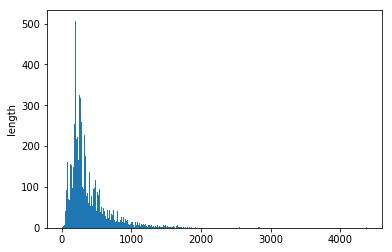

In [147]:
#check the distribution of txt length and find the mean 
total = 0
lengthlist=[]
for data in train_data_indices_4n:
    lengthlist.append(len(data))
    total += len(data)
mean_length = total/len(train_data_indices_4n)
print(mean_length,max(lengthlist))

plt.hist(lengthlist, bins=1000)
plt.ylabel('length');

In [44]:
MAX_SENTENCE_LENGTH = 1500
class NewsGroupDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list):
        """
        @param data_list: list of newsgroup tokens 
        @param target_list: list of newsgroup targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key):
        """
        Triggered when you call dataset[i]
        """
        
        token_idx = self.data_list[key][:MAX_SENTENCE_LENGTH]
        label = self.target_list[key]
        return [token_idx, len(token_idx), label]

def newsgroup_collate_func(batch):
    """
    Customized function for DataLoader that dynamically pads the batch so that all 
    data have the same length
    """
    data_list = []
    label_list = []
    length_list = []
    #print("collate batch: ", batch[0][0])
    #batch[0][0] = batch[0][0][:MAX_SENTENCE_LENGTH]
    for datum in batch:
        label_list.append(datum[2])
        length_list.append(datum[1])
    # padding
    for datum in batch:
        padded_vec = np.pad(np.array(datum[0]), 
                                pad_width=((0,MAX_SENTENCE_LENGTH-datum[1])), 
                                mode="constant", constant_values=0)
        data_list.append(padded_vec)  #padded_vec 是一个1d， 200长的vector
    return [torch.from_numpy(np.array(data_list)), torch.LongTensor(length_list), torch.LongTensor(label_list)]

In [45]:
#build model
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

#dataloader for pytorch
train_dataset = NewsGroupDataset(train_data_indices_4n, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices_4n, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices_4n, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

learning_rate = 0.01
num_epochs = 10 # number epoch to train

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Function for testing the model
eachval_accuracy_list4=[]
for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train() 
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            eachval_accuracy_list4.append(val_acc)
#             print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
#                        epoch+1, num_epochs, i+1, len(train_loader), val_acc))

In [47]:
all_accuracy = [eachval_accuracy_list1,eachval_accuracy_list2,eachval_accuracy_list3,eachval_accuracy_list4]

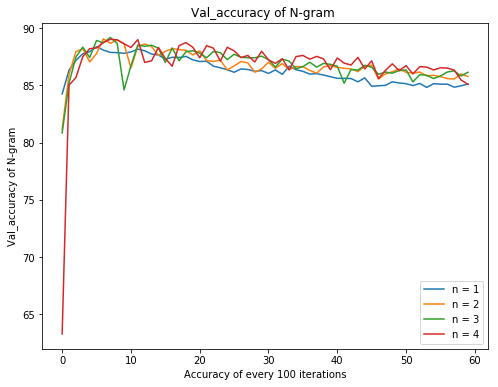

In [49]:
# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
i = 0
for a in [1, 2, 3, 4]:
#     theta_hist1, loss_hist1 = batch_grad_descent(X_train, y_train, alpha=a)
    plt.plot(all_accuracy[i], label='n = %r' %a)
    i+=1
ax.set_xlabel('Accuracy of every 100 iterations')
ax.set_ylabel('Val_accuracy of N-gram')
plt.title('Val_accuracy of N-gram ')
plt.legend(loc='best')

In [50]:
x_range = [str(i) + " thounsand iterations" for i in np.arange(1, 7)]
n_list = ['N = {}'.format(n) for n in [1, 2, 3, 4]]
oneT_n_val_accuracy_list = []
for i in range(4):
    oneT_n_val_accuracy_list.append([all_accuracy[i][j] for j in range(0, 60, 10)])
df_n_val = pd.DataFrame.from_records(oneT_n_val_accuracy_list, columns=x_range, index = n_list)
df_n_val

,1 thounsand iterations,2 thounsand iterations,3 thounsand iterations,4 thounsand iterations,5 thounsand iterations,6 thounsand iterations
N = 1,84.254538,87.925760,87.089537,86.049358,85.621048,85.151948
N = 2,81.174791,86.518458,88.027738,87.028350,86.579645,86.151336
N = 3,80.848460,86.722415,87.823781,87.252702,86.681623,86.355293
N = 4,63.287783,88.313278,87.415868,87.232307,87.395472,86.722415


In [156]:
# print ("After training for {} epochs".format(num_epochs))
print ("Val Acc {}".format(test_model(val_loader, model)))
print ("Test Acc {}".format(test_model(test_loader, model)))

Val Acc 88.98633489700184
Test Acc 87.67323121808899


# Tuning vocabulary size

## From the above ngram performance, the 4 gram achieved the best validation accuracy 86.72, so I will test the vocabulary size on 4 gram model

In [165]:
max_vocab_size_list = [5000, 10000, 15000, 20000]
# build a vocabulary of size = 10000 for combined 1,2 grams tokens.
val_accuracy_list = []
for i in max_vocab_size_list:
    # save index 0 for unk and 1 for pad
    max_vocab_size = i
    PAD_IDX = 0
    UNK_IDX = 1
    token2id, id2token = build_vocab(all_train_tokens_4)

    #indexing other datasets
    train_data_indices_4n = token2index_dataset(train_data_tokens_4)
    val_data_indices_4n = token2index_dataset(val_data_tokens_4)
    test_data_indices_4n = token2index_dataset(test_data_tokens_4)

    #build model
    emb_dim = 100
    model = BagOfWords(len(id2token), emb_dim)

    #dataloader for pytorch
    train_dataset = NewsGroupDataset(train_data_indices_4n, train_targets)
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    val_dataset = NewsGroupDataset(val_data_indices_4n, val_targets)
    val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=True)

    test_dataset = NewsGroupDataset(test_data_indices_4n, test_targets)
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                               batch_size=BATCH_SIZE,
                                               collate_fn=newsgroup_collate_func,
                                               shuffle=False)

    learning_rate = 0.001
    num_epochs = 10 # number epoch to train

    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()  
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    eachval_accuracy_list = []

    # Function for testing the model
    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train() 
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                eachval_accuracy_list.append(val_acc)
#                 print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
#                            epoch+1, num_epochs, i+1, len(train_loader), val_acc))
               
    val_accuracy_list.append(eachval_accuracy_list)

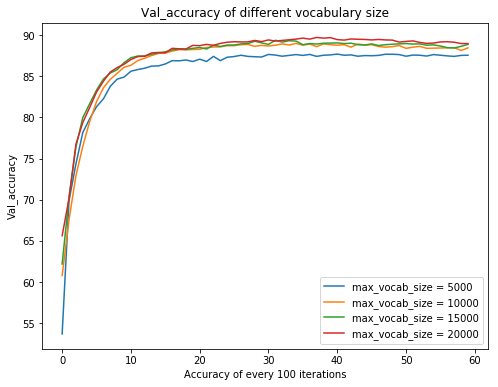

In [166]:
# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
i = 0
for a in [5000, 10000, 15000, 20000]:
#     theta_hist1, loss_hist1 = batch_grad_descent(X_train, y_train, alpha=a)
    plt.plot(val_accuracy_list[i], label='max_vocab_size = %r' %a)
    i+=1
ax.set_xlabel('Accuracy of every 100 iterations')
ax.set_ylabel('Val_accuracy')
plt.title('Val_accuracy of different vocabulary size')
plt.legend(loc='best')

In [167]:
vocab_val_accuracy_list = val_accuracy_list

In [168]:
x_range = [str(i) + " thounsand iterations" for i in np.arange(1, 7)]
vocab_list = ['Vocabulary size = {}'.format(n) for n in max_vocab_size_list]
oneT_vocab_val_accuracy_list = []
for i in range(len(max_vocab_size_list)):
    oneT_vocab_val_accuracy_list.append([vocab_val_accuracy_list[i][j] for j in range(0, 60, 10)])
df_vocab_val = pd.DataFrame.from_records(oneT_vocab_val_accuracy_list, columns=x_range, index = vocab_list)
df_vocab_val

,1 thounsand iterations,2 thounsand iterations,3 thounsand iterations,4 thounsand iterations,5 thounsand iterations,6 thounsand iterations
Vocabulary size = 5000,53.68,85.62,87.08,87.66,87.70,87.44
Vocabulary size = 10000,60.78,86.34,88.28,88.68,88.78,88.40
Vocabulary size = 15000,62.18,87.26,88.50,88.88,89.06,88.98
Vocabulary size = 20000,65.62,87.04,88.72,89.42,89.46,89.24


# Tuning embedding size
## vocabulary size = 20000 achieved the best validation accuracy, so I will test the embeding size on vocabulary size = 20000.

In [69]:
emb_dim_list = [50, 100, 200, 300]
# build a vocabulary of size = 10000 for combined 1,2 grams tokens.
val_accuracy_list = []

max_vocab_size = 20000
PAD_IDX = 0
UNK_IDX = 1
token2id, id2token = build_vocab(all_train_tokens_4)

#indexing other datasets
train_data_indices_4n = token2index_dataset(train_data_tokens_4)
val_data_indices_4n = token2index_dataset(val_data_tokens_4)
test_data_indices_4n = token2index_dataset(test_data_tokens_4)

#dataloader for pytorch
train_dataset = NewsGroupDataset(train_data_indices_4n, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices_4n, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices_4n, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

for i in emb_dim_list:
    # save index 0 for unk and 1 for pad
    emb_dim = i

    #build model
    model = BagOfWords(len(id2token), emb_dim)

    learning_rate = 0.001
    num_epochs = 10 # number epoch to train

    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()  
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    eachval_accuracy_list = []

    # Function for testing the model
    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train() 
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                eachval_accuracy_list.append(val_acc)
#                 print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
#                            epoch+1, num_epochs, i+1, len(train_loader), val_acc))
               
    val_accuracy_list.append(eachval_accuracy_list)

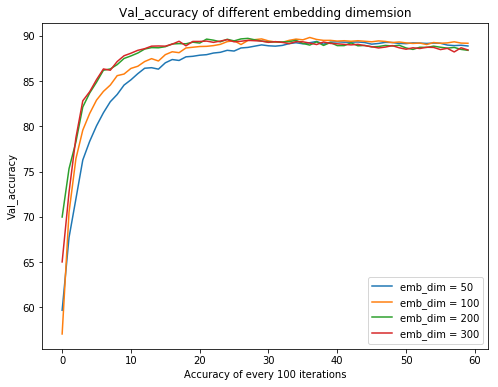

In [70]:
# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
i = 0
for a in emb_dim_list:
#     theta_hist1, loss_hist1 = batch_grad_descent(X_train, y_train, alpha=a)
    plt.plot(val_accuracy_list[i], label='emb_dim = %r' %a)
    i+=1
ax.set_xlabel('Accuracy of every 100 iterations')
ax.set_ylabel('Val_accuracy')
plt.title('Val_accuracy of different embedding dimemsion')
plt.legend(loc='best')

In [71]:
emb_val_accuracy_list = val_accuracy_list

In [164]:
x_range = [str(i) + " thounsand iterations" for i in np.arange(1, 7)]
emb_list = ['Embeding dimension = {}'.format(n) for n in emb_dim_list]
oneT_emb_val_accuracy_list = []
for i in range(len(emb_val_accuracy_list)):
    oneT_emb_val_accuracy_list.append([emb_val_accuracy_list[i][j] for j in range(0, 60, 10)])
df_emb_val = pd.DataFrame.from_records(oneT_emb_val_accuracy_list, columns=x_range, index = emb_list)

In [163]:
df_emb_val

,1 thounsand iterations,2 thounsand iterations,3 thounsand iterations,4 thounsand iterations,5 thounsand iterations,6 thounsand iterations
Embeding dimension = 50,59.68,85.14,87.86,88.90,89.34,89.14
Embeding dimension = 100,57.06,86.40,88.82,89.44,89.42,89.22
Embeding dimension = 200,69.98,87.78,89.20,89.32,88.92,88.66
Embeding dimension = 300,65.02,88.08,89.38,89.28,89.12,88.52


# Tuning learning rate

In [92]:
#import earlystopping to find the best model in training epoch
# from torchsample.callbacks import EarlyStopping, ModelCheckpoint
learning_rate_list = [0.1, 0.01, 0.005, 0.001, 0.0005]
val_accuracy_list = []

num_epochs = 15 # number epoch to train

max_vocab_size = 20000
PAD_IDX = 0
UNK_IDX = 1
token2id, id2token = build_vocab(all_train_tokens_4)

#indexing other datasets
train_data_indices_4n = token2index_dataset(train_data_tokens_4)
val_data_indices_4n = token2index_dataset(val_data_tokens_4)
test_data_indices_4n = token2index_dataset(test_data_tokens_4)

#dataloader for pytorch
train_dataset = NewsGroupDataset(train_data_indices_4n, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices_4n, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices_4n, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

for learning_rate in learning_rate_list:
    emb_dim = 100
    model = BagOfWords(len(id2token), emb_dim)
    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()  
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    eachval_accuracy_list = []  
    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train() #是怎么回事
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model) 
                eachval_accuracy_list.append(val_acc)
#                 print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
#                            epoch+1, num_epochs, i+1, len(train_loader), val_acc))

    # add accuracy epoch list according different learning rate
    val_accuracy_list.append(eachval_accuracy_list)
    

In [94]:
lr_val_accuracy_list = val_accuracy_list

## Annealing of learning rate

In [95]:
#initialize learning rate
lr_anneal = 0.1   

emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

anneal_val_accuracy_list = []  
for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        if i >= 0 and i % 100 == 0:
        # Criterion and Optimizer 
            learning_rate = max(lr_anneal - 0.001 * i, 0.0001)
            criterion = torch.nn.CrossEntropyLoss()  
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        model.train() #是怎么回事
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 100 == 0:
            # validate
            val_acc = test_model(val_loader, model) 
            anneal_val_accuracy_list.append(val_acc)

# add accuracy epoch list according different learning rate


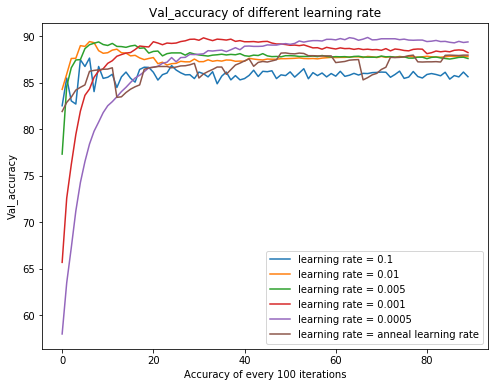

In [96]:
# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
i = 0
for a in learning_rate_list:
#     theta_hist1, loss_hist1 = batch_grad_descent(X_train, y_train, alpha=a)
    plt.plot(lr_val_accuracy_list[i], label='learning rate = %r' %a)
    i+=1
      
plt.plot(anneal_val_accuracy_list, label='learning rate = anneal learning rate' )

ax.set_xlabel('Accuracy of every 100 iterations')
ax.set_ylabel('Val_accuracy')
plt.title('Val_accuracy of different learning rate')
plt.legend(loc='best')

In [97]:
all_lr_val_accuracy_list = lr_val_accuracy_list.append(anneal_val_accuracy_list)

In [108]:
learning_rate_list.append('anneal')

In [121]:
x_range = [str(i) + " thounsand iterations" for i in np.arange(1, 10)]
lr_list = ['Learning Rate = {}'.format(n) for n in learning_rate_list]
oneT_lr_val_accuracy_list = []
for i in range(len(lr_val_accuracy_list)):
    oneT_lr_val_accuracy_list.append([lr_val_accuracy_list[i][j] for j in range(0, 90, 10)])
df_lr_val = pd.DataFrame.from_records(oneT_lr_val_accuracy_list, columns=x_range, index = lr_list)

In [122]:
df_lr_val

,1 thounsand iterations,2 thounsand iterations,3 thounsand iterations,4 thounsand iterations,5 thounsand iterations,6 thounsand iterations,7 thounsand iterations,8 thounsand iterations,9 thounsand iterations
Learning Rate = 0.1,82.54,85.60,86.14,86.16,85.46,86.18,85.72,86.16,85.90
Learning Rate = 0.01,84.30,88.24,87.72,87.28,87.32,87.62,87.72,87.84,87.86
Learning Rate = 0.005,77.34,89.02,88.38,88.00,87.92,87.92,87.82,87.88,87.60
Learning Rate = 0.001,65.70,87.10,89.42,89.58,89.42,89.04,88.64,88.50,88.14
Learning Rate = 0.0005,58.00,82.54,86.68,88.08,88.94,89.14,89.62,89.74,89.44
Learning Rate = anneal,81.92,86.48,86.68,85.52,87.36,88.14,87.18,86.44,87.26


# tuning optimizer

### from "tuning learing rate we know lr = 0.001" achieve best for the previous model(unigram, adam optimizer), now I try to tune 2 optimizers- Adam & SGD,  with lr = 0.001 and other parameters remain same.

In [149]:
max_vocab_size = 20000
PAD_IDX = 0
UNK_IDX = 1
token2id, id2token = build_vocab(all_train_tokens_4)

#indexing other datasets
train_data_indices_4n = token2index_dataset(train_data_tokens_4)
val_data_indices_4n = token2index_dataset(val_data_tokens_4)
test_data_indices_4n = token2index_dataset(test_data_tokens_4)


#dataloader for pytorch
train_dataset = NewsGroupDataset(train_data_indices_4n, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices_4n, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices_4n, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

optimizer_list = ['Adam','SGD']
val_accuracy_list = []

for i in optimizer_list:
    #build model
    emb_dim = 100
    model = BagOfWords(len(id2token), emb_dim)
    
    # Criterion and Optimizer
    criterion = torch.nn.CrossEntropyLoss()   
    if i == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
    else:
        optimizer = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.9)

    num_epochs = 15 # number epoch to train

    eachval_accuracy_list = []
    # Function for testing the model
    for epoch in range(num_epochs):
        for i, (data, lengths, labels) in enumerate(train_loader):
            model.train() 
            data_batch, length_batch, label_batch = data, lengths, labels
            optimizer.zero_grad()
            outputs = model(data_batch, length_batch)
            loss = criterion(outputs, label_batch)
            loss.backward()
            optimizer.step()
            # validate every 100 iterations
            if i > 0 and i % 100 == 0:
                # validate
                val_acc = test_model(val_loader, model)
                eachval_accuracy_list.append(val_acc)
#                 print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
#                            epoch+1, num_epochs, i+1, len(train_loader), val_acc))

    val_accuracy_list.append(eachval_accuracy_list)  

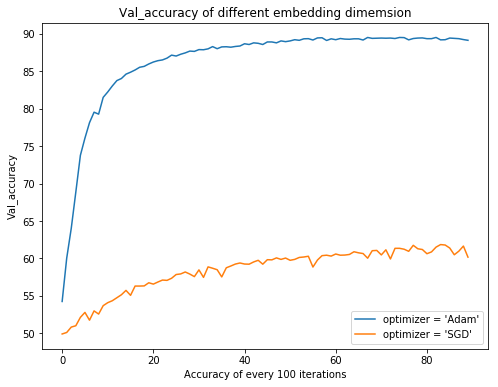

In [150]:
# Plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
i = 0
for a in optimizer_list:
#     theta_hist1, loss_hist1 = batch_grad_descent(X_train, y_train, alpha=a)
    plt.plot(val_accuracy_list[i], label='optimizer = %r' %a)
    i+=1
ax.set_xlabel('Accuracy of every 100 iterations')
ax.set_ylabel('Val_accuracy')
plt.title('Val_accuracy of different embedding dimemsion')
plt.legend(loc='best')

In [151]:
optimizer_val_accuracy_list = val_accuracy_list

In [152]:
x_range = [str(i) + " thounsand iterations" for i in np.arange(1, 10)]
op_list = ['Optimizer = {}'.format(n) for n in optimizer_list]
oneT_op_val_accuracy_list = []
for i in range(len(optimizer_val_accuracy_list)):
    oneT_op_val_accuracy_list.append([optimizer_val_accuracy_list[i][j] for j in range(0, 90, 10)])
df_op_val = pd.DataFrame.from_records(oneT_op_val_accuracy_list, columns=x_range, index = op_list)

In [153]:
df_op_val

,1 thounsand iterations,2 thounsand iterations,3 thounsand iterations,4 thounsand iterations,5 thounsand iterations,6 thounsand iterations,7 thounsand iterations,8 thounsand iterations,9 thounsand iterations
Optimizer = Adam,54.26,82.24,86.24,87.90,88.68,89.06,89.22,89.44,89.36
Optimizer = SGD,49.92,54.10,56.58,58.48,59.26,59.76,60.60,60.48,60.64


## after tunning all the parameters above, I choose n=4, lr=0.0005, embedding dimension =100, vocabulary size = 20000, adam optimizer for the model.

In [51]:
max_vocab_size = 20000
PAD_IDX = 0
UNK_IDX = 1
token2id, id2token = build_vocab(all_train_tokens_4)

#indexing other datasets
train_data_indices_4n = token2index_dataset(train_data_tokens_4)
val_data_indices_4n = token2index_dataset(val_data_tokens_4)
test_data_indices_4n = token2index_dataset(test_data_tokens_4)


#dataloader for pytorch
train_dataset = NewsGroupDataset(train_data_indices_4n, train_targets)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

val_dataset = NewsGroupDataset(val_data_indices_4n, val_targets)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=True)

test_dataset = NewsGroupDataset(test_data_indices_4n, test_targets)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

#build model
emb_dim = 100
model = BagOfWords(len(id2token), emb_dim)

# Criterion and Optimizer
criterion = torch.nn.CrossEntropyLoss()   
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

num_epochs = 15 # number epoch to train

# Function for testing the model
for epoch in range(num_epochs):
    for i, (data, lengths, labels) in enumerate(train_loader):
        model.train() 
        data_batch, length_batch, label_batch = data, lengths, labels
        optimizer.zero_grad()
        outputs = model(data_batch, length_batch)
        loss = criterion(outputs, label_batch)
        loss.backward()
        optimizer.step()
        # validate every 100 iterations
        if i > 0 and i % 300 == 0:
            # validate
            val_acc = test_model(val_loader, model)
            print('Epoch: [{}/{}], Step: [{}/{}], Validation Acc: {}'.format( 
                       epoch+1, num_epochs, i+1, len(train_loader), val_acc))


Epoch: [1/15], Step: [301/625], Validation Acc: 51.98857842137467
Epoch: [1/15], Step: [601/625], Validation Acc: 69.44727717723842
Epoch: [2/15], Step: [301/625], Validation Acc: 69.36569447277178
Epoch: [2/15], Step: [601/625], Validation Acc: 80.11421578625331
Epoch: [3/15], Step: [301/625], Validation Acc: 79.97144605343667
Epoch: [3/15], Step: [601/625], Validation Acc: 81.66428717111972
Epoch: [4/15], Step: [301/625], Validation Acc: 84.80522129308586
Epoch: [4/15], Step: [601/625], Validation Acc: 84.90719967366918
Epoch: [5/15], Step: [301/625], Validation Acc: 85.37630022435243
Epoch: [5/15], Step: [601/625], Validation Acc: 85.37630022435243
Epoch: [6/15], Step: [301/625], Validation Acc: 86.21252294513563
Epoch: [6/15], Step: [601/625], Validation Acc: 86.57964511523556
Epoch: [7/15], Step: [301/625], Validation Acc: 86.92637160921885
Epoch: [7/15], Step: [601/625], Validation Acc: 87.21191107485213
Epoch: [8/15], Step: [301/625], Validation Acc: 87.31388945543544
Epoch: [8/

In [52]:
print ("Val Acc {}".format(test_model(val_loader, model)))
print ("Test Acc {}".format(test_model(test_loader, model)))

Val Acc 89.10870895370182
Test Acc 88.27700786125294


## Get example from validation data

In [268]:
#don't shuffle validation dataset, so the idx of validation dataset will be same as validation data
val_loader_userinput = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=newsgroup_collate_func,
                                           shuffle=False)

# Function for finding 3 wrong and 3 right predictions
def find_model(loader, model):
    """
    Help function that tests the model's performance on a dataset
    @param: loader - data loader for the dataset to test against
    """
    correct = 0
    total = 0
    rightpredict = []
    rightidx = []
    rightlabel = []
    wrongpredict = []
    wrongidx = []
    wronglabel = []
    model.eval()
    for i, (data, lengths, labels) in enumerate(loader):
        data_batch, length_batch, label_batch = data, lengths, labels
        outputs = F.softmax(model(data_batch, length_batch), dim=1)
        predicted = outputs.max(1, keepdim=True)[1]  #1代表找出每行的最大值，[1]代表这个最大值在的位置  
        total += labels.size(0)
        result = predicted.eq(labels.view_as(predicted))
        result = result.view_as(labels)
        nonzero = (result != 0).nonzero()
        zero = (result == 0).nonzero()
        for j in nonzero:  
            idx = int(j.item())
            rightpredict.append(data_batch[idx])
            rightidx.append(idx+i*BATCH_SIZE)
            rightlabel.append(labels[idx])
            if len(rightpredict) >= 3:
                break
        for j in zero:           
            idx = int(j.item())
            wrongpredict.append(data_batch[idx])
            wrongidx.append(idx+i*BATCH_SIZE)
            wronglabel.append(labels[idx])
            if len(wrongpredict) >= 3:
                break
           
        if len(wrongpredict) >= 3 and len(rightpredict) >= 3:
            return rightpredict,wrongpredict, rightidx, wrongidx, rightlabel,wronglabel

In [269]:
rightpredict, wrongpredict, rightidx, wrongidx, rightlabel,wronglabel= find_model(val_loader_userinput, model)

In [273]:
rightlabel = ['Negative' if i.item()== 0 else 'Positive' for i in rightlabel]
wronglabel = ['Negative' if i.item()== 0 else 'Positive' for i in wronglabel]
# wronglabel

In [274]:
print('right prediction index: {}'.format(rightidx),'corresponding right prediction label: {}'.format(rightlabel))
print('wrong prediction index: {}'.format(wrongidx), 'corresponding wrong prediction index: {}'.format(wronglabel))

right prediction index: [1, 3, 4] corresponding right prediction label: ['Negative', 'Negative', 'Negative']
wrong prediction index: [0, 2, 15] corresponding wrong prediction index: ['Negative', 'Positive', 'Positive']


In [266]:
print('    ' + val_data[1])
print('    ' +val_data[3])
print('    ' +val_data[4])

    PROM NIGHT (2008)directed by: Nelson McCormickstarring: Brittany Snow, Scott Porter, Jessica Stroup, and Dana Davisplot: Three years ago, Donna (Brittany Snow) witnessed the death of her entire family at the hands of her teacher (Jonathan Schaech) who has a bit of a crush on her. Now, she is preparing for her senior prom with her stupid annoying friends. Once there, they start dying one by one because the killer escaped from prison and no one bothered to warn Donna because apparently her prom is too important to interrupt. pros: I got a few good laughs out of the film due to the terrible dialog and the dumb character moves.An example:Everyone decides not to tell Donna that the man who is oddly obsessed with her (she doesn't seem that great) has escaped from prison. Their reason: They don't want to embarrass her in front of all her friends. LOLcons: Let me start off by saying I'm a huge slasher fan. Usually I can have fun with even the bad ones. I even like some PG-13 horror films. 

In [259]:
#double check val and id2token are same
[id2token[indice] for indice in rightpredict[0]]

[('prom',),
 ('night',),
 '<unk>',
 ('nelson',),
 '<unk>',
 '<unk>',
 ('snow',),
 ('scot',),
 ('port',),
 ('jessic',),
 '<unk>',
 ('dan',),
 '<unk>',
 ('three',),
 ('year',),
 ('ago',),
 ('donn',),
 '<unk>',
 ('snow',),
 ('wit',),
 ('dea',),
 ('entir',),
 ('famy',),
 ('hand',),
 ('teach',),
 ('jonath',),
 '<unk>',
 ('bit',),
 ('crush',),
 ('prep',),
 ('seny',),
 ('prom',),
 ('stupid',),
 ('annoy',),
 ('friend',),
 ('start',),
 ('dying',),
 ('on',),
 ('on',),
 ('kil',),
 ('escap',),
 ('prison',),
 ('on',),
 ('both',),
 ('warn',),
 ('donn',),
 ('app',),
 ('prom',),
 ('import',),
 ('interrupt',),
 ('pro',),
 ('got',),
 ('good',),
 ('laugh',),
 ('film',),
 ('due',),
 ('terr',),
 ('dialog',),
 ('dumb',),
 ('charact',),
 ('mov',),
 ('exampl',),
 ('everyon',),
 ('decid',),
 ('tel',),
 ('donn',),
 ('man',),
 ('od',),
 ('obsess',),
 ("n't",),
 ('seem',),
 ('gre',),
 ('escap',),
 ('prison',),
 ('reason',),
 ("n't",),
 ('want',),
 ('embarrass',),
 ('front',),
 ('friend',),
 '<unk>',
 ('let',),
 (

In [267]:
print('    ' + val_data[0])
print('    ' +val_data[2])
print('    ' +val_data[15])

    It's unlikely that anyone except those who adore silent films will appreciate any of the lyrical camera-work and busy (but scratchy) background score that accompanies this 1933 release. Although sound came into general use in 1928, there are no more than fifty words spoken to tell the story of a woman, unhappily married, who deserts her husband for a younger man after a romantic interlude in the woods.The most vividly photographed scene has the jealous husband giving a lift to the young man for a ride into town, proceeding to drive normally until he realizes the man is his wife's lover. In a frenzy of jealousy, he drives at top speed toward a railroad crossing but changes his mind at the last moment, losing his nerve. It's probably the most tension-filled scene in the otherwise decidedly slow-moving and obviously contrived story.HEDY LAMARR is given the sort of close-up treatment lavished on Marlene Dietrich by her discoverer, but her beauty had not yet been refined by the cosmetic

In [261]:
[id2token[indice] for indice in wrongpredict[0]]

[("'s",),
 ('unlik',),
 ('anyon',),
 ('exceiv',),
 ('ad',),
 ('sil',),
 ('film',),
 ('apprecy',),
 ('lyr',),
 ('camer',),
 ('work',),
 ('busy',),
 '<unk>',
 ('background',),
 ('scor',),
 ('accompany',),
 ('1933',),
 ('releas',),
 ('although',),
 ('sound',),
 ('cam',),
 ('gen',),
 ('us',),
 ('1928',),
 ('fifty',),
 ('word',),
 ('spok',),
 ('tel',),
 ('story',),
 ('wom',),
 ('unhappy',),
 ('marry',),
 ('desert',),
 ('husband',),
 ('young',),
 ('man',),
 ('rom',),
 ('interlud',),
 ('wood',),
 ('vivid',),
 ('photograph',),
 ('scen',),
 ('jeal',),
 ('husband',),
 ('giv',),
 ('lift',),
 ('young',),
 ('man',),
 ('rid',),
 ('town',),
 ('process',),
 ('driv',),
 ('norm',),
 ('real',),
 ('man',),
 ('wif',),
 ("'s",),
 ('lov',),
 ('frenzy',),
 ('jealousy',),
 ('driv',),
 ('top',),
 ('spee',),
 ('toward',),
 ('railroad',),
 ('cross',),
 ('chang',),
 ('mind',),
 ('last',),
 ('mom',),
 ('los',),
 ('nerv',),
 ("'s",),
 ('prob',),
 ('tend',),
 ('fil',),
 ('scen',),
 ('otherw',),
 ('decid',),
 ('slow',